In [1]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [9]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install sklearn-learn

ERROR: Could not find a version that satisfies the requirement sklearn-learn (from versions: none)
ERROR: No matching distribution found for sklearn-learn


In [10]:
!pip install scikit-learn

In [181]:
import numpy as np
import pandas as pd
from scipy import stats
import pickle

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [182]:
ping_df = pd.read_csv('/Users/mikhailkatsuro/Downloads/diplom/ping_training_data.csv', delimiter='\t')
voice_df = pd.read_csv('/Users/mikhailkatsuro/Downloads/diplom/voice_training_data.csv', delimiter='\t')
dns_df = pd.read_csv('/Users/mikhailkatsuro/Downloads/diplom/dns_training_data.csv', delimiter='\t')
telnet_df = pd.read_csv('/Users/mikhailkatsuro/Downloads/diplom/telnet_training_data.csv', delimiter='\t')
df = pd.concat([ping_df, voice_df, dns_df, telnet_df], ignore_index=True)

In [183]:
df.dropna(inplace=True)

In [184]:
df.drop('Forward Packets', axis=1, inplace=True)
df.drop('Forward Bytes', axis=1, inplace=True)
df.drop('Reverse Packets', axis=1, inplace=True)
df.drop('Reverse Bytes', axis=1, inplace=True)

In [185]:
print(df.shape)

(5242, 13)


In [186]:
df.describe()

,Delta Forward Packets,Delta Forward Bytes,Forward Instantaneous Packets per Second,Forward Average Packets per second,Forward Instantaneous Bytes per Second,Forward Average Bytes per second,Delta Reverse Packets,Delta Reverse Bytes,DeltaReverse Instantaneous Packets per Second,Reverse Average Packets per second,Reverse Instantaneous Bytes per Second,Reverse Average Bytes per second
count,5242.000000,5242.000000,5242.000000,5242.000000,5242.000000,5242.000000,5242.000000,5242.000000,5242.000000,5242.000000,5242.000000,5242.000000
mean,7.814765,682.359214,7.763640,6.094360,677.842999,530.202926,17.525754,2070.781000,17.447921,15.710718,2064.795498,1943.829194
std,27.445539,2417.020821,27.343341,10.656380,2407.997270,937.773493,31.726859,3404.747532,31.645749,18.427478,3401.356026,2739.969899
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.909309,0.000000,62.009611,1.000000,71.000000,1.000000,1.020725,71.000000,98.670691
50%,1.000000,66.000000,1.000000,1.021459,66.000000,98.762821,1.000000,98.000000,1.000000,1.430508,98.000000,192.470941
75%,1.000000,98.000000,1.000000,1.038462,98.000000,99.485632,37.000000,3696.000000,37.000000,34.969697,3541.000000,2313.000000
max,211.000000,18581.000000,211.000000,76.750000,18581.000000,6711.000000,210.000000,15484.000000,210.000000,76.500000,15484.000000,7054.188679


In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5242 entries, 0 to 5242
Data columns (total 13 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Delta Forward Packets                          5242 non-null   int64  
 1   Delta Forward Bytes                            5242 non-null   int64  
 2   Forward Instantaneous Packets per Second       5242 non-null   float64
 3   Forward Average Packets per second             5242 non-null   float64
 4   Forward Instantaneous Bytes per Second         5242 non-null   float64
 5   Forward Average Bytes per second               5242 non-null   float64
 6   Delta Reverse Packets                          5242 non-null   float64
 7   Delta Reverse Bytes                            5242 non-null   float64
 8   DeltaReverse Instantaneous Packets per Second  5242 non-null   float64
 9   Reverse Average Packets per second             5242 non-n

In [188]:
df['Traffic Type'] = df['Traffic Type'].astype('category')

In [189]:
df['Traffic Type'].cat.categories

Index(['dns', 'ping', 'telnet', 'voice'], dtype='object')

In [190]:
df['Traffic Type'].cat.codes.head()

0    1
1    1
2    1
3    1
4    1
dtype: int8

In [191]:
print('Features:',df.columns[:-1].values)

Features: ['Delta Forward Packets' 'Delta Forward Bytes'
 'Forward Instantaneous Packets per Second'
 'Forward Average Packets per second'
 'Forward Instantaneous Bytes per Second'
 'Forward Average Bytes per second' 'Delta Reverse Packets'
 'Delta Reverse Bytes' 'DeltaReverse Instantaneous Packets per Second'
 'Reverse Average Packets per second'
 'Reverse Instantaneous Bytes per Second'
 'Reverse Average Bytes per second']


In [192]:
print ('Value counts:')
df['Traffic Type'].value_counts()


Value counts:


Traffic Type
ping      1770
telnet    1181
dns       1154
voice     1137
Name: count, dtype: int64

In [193]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [194]:
ping_df = pd.read_csv('/Users/mikhailkatsuro/Downloads/diplom/ping_training_data.csv', delimiter='\t')
voice_df = pd.read_csv('/Users/mikhailkatsuro/Downloads/diplom/voice_training_data.csv', delimiter='\t')
dns_df = pd.read_csv('/Users/mikhailkatsuro/Downloads/diplom/dns_training_data.csv', delimiter='\t')
telnet_df = pd.read_csv('/Users/mikhailkatsuro/Downloads/diplom/telnet_training_data.csv', delimiter='\t')
df = pd.concat([ping_df, voice_df, dns_df, telnet_df], ignore_index=True)

In [195]:
df.dropna(inplace=True)

In [196]:
X = df.drop('Traffic Type', axis=1)
y = df['Traffic Type']

In [197]:
print(df.head())

   Forward Packets  Forward Bytes  Delta Forward Packets  Delta Forward Bytes  \
0                0              0                      0                    0   
1                1             98                      1                   98   
2                1             98                      1                   98   
3                2            196                      1                   98   
4                2            196                      1                   98   

   Forward Instantaneous Packets per Second  \
0                                       0.0   
1                                       1.0   
2                                       1.0   
3                                       1.0   
4                                       1.0   

   Forward Average Packets per second  Forward Instantaneous Bytes per Second  \
0                                 0.0                                     0.0   
1                                 1.0                               

In [198]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [199]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [200]:
idx = 2590 #random number
single_x_test = [df.iloc[idx].drop('Traffic Type').tolist()]
single_y_test = df.iloc[idx]['Traffic Type']

In [201]:
single_prediction = clf.predict(single_x_test)
print('For this sample, our model predicted %s and it was actually %s' % (single_prediction[0], single_y_test))

For this sample, our model predicted voice and it was actually voice


In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5242 entries, 0 to 5242
Data columns (total 17 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Forward Packets                                5242 non-null   int64  
 1   Forward Bytes                                  5242 non-null   int64  
 2   Delta Forward Packets                          5242 non-null   int64  
 3   Delta Forward Bytes                            5242 non-null   int64  
 4   Forward Instantaneous Packets per Second       5242 non-null   float64
 5   Forward Average Packets per second             5242 non-null   float64
 6   Forward Instantaneous Bytes per Second         5242 non-null   float64
 7   Forward Average Bytes per second               5242 non-null   float64
 8   Reverse Packets                                5242 non-null   float64
 9   Reverse Bytes                                  5242 non-n

In [203]:
predictions = clf.predict(X_test)

In [204]:
resultsDF = pd.DataFrame({
        'true':y_test,
        'predicted':predictions
    })
resultsDF.head()

,true,predicted
1859,voice,voice
3537,dns,dns
1128,ping,ping
4707,telnet,telnet
931,ping,ping


In [205]:
print('Accuracy: %.2f%%' % (accuracy_score(predictions,y_test)*100))

Accuracy: 99.81%


In [206]:
print(pickle.format_version)
import pickle

# Сохраняем модель в файл
with open('/Users/mikhailkatsuro/Downloads/diplom/DecisionTree.pkl', 'wb') as f:
    pickle.dump(model, f)

4.0


In [38]:
pickle.dump(clf,open('DecisionTree','wb'))

In [39]:
y_true = pd.Series(['ping','voice', 'dns', 'telnet'])
y_pred = pd.Series(['ping','voice', 'dns', 'telnet'])

In [40]:
cm = confusion_matrix(y_test, predictions)
print(cm)

[[229   0   0   0]
 [  0 382   0   0]
 [  0   1 232   0]
 [  1   0   0 204]]


In [41]:
print("\nClassification Report:")
print(classification_report(y_test, predictions))


Classification Report:
              precision    recall  f1-score   support

         dns       1.00      1.00      1.00       229
        ping       1.00      1.00      1.00       382
      telnet       1.00      1.00      1.00       233
       voice       1.00      1.00      1.00       205

    accuracy                           1.00      1049
   macro avg       1.00      1.00      1.00      1049
weighted avg       1.00      1.00      1.00      1049



In [42]:
import pandas as pd
from numpy.random import randint

In [43]:
num_classes = len(set(y_true))

In [44]:
indices = [f'Actual {i}' for i in range(num_classes)]
columns = [f'Predicted {i}' for i in range(num_classes)]

In [45]:
cm_df = pd.DataFrame(cm,index=indices, columns=columns)
print(cm_df)

          Predicted 0  Predicted 1  Predicted 2  Predicted 3
Actual 0          229            0            0            0
Actual 1            0          382            0            0
Actual 2            0            1          232            0
Actual 3            1            0            0          204


In [50]:
plt.figure(figsize=(6,6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix', fontsize=15)
plt.colorbar()
tick_marks = np.arange(len(y.unique()))
plt.xticks(tick_marks, y.unique(), rotation=45, fontsize=12)
plt.yticks(tick_marks, y.unique(), fontsize=12)
plt.xlabel('True Label', fontsize=15)
plt.ylabel('Predicted Label', fontsize=15)

for i in range(len(cm)):
    for j in range(len(cm[i])):
        color = 'black'   
        if cm[i][j] > 5:
            color = 'white'
        plt.text(j, i, format(cm[i][j]), 
                horizontalalignment='center',
                color=color, fontsize=15)

In [49]:
df.drop('Traffic Type',axis=1).values[0:5]

array([[  0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
          0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ],
       [  1. ,  98. ,   1. ,  98. ,   1. ,   1. ,  98. ,  98. ,   0. ,
          0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ],
       [  1. ,  98. ,   1. ,  98. ,   1. ,   1. ,  98. ,  98. ,   0. ,
          0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ],
       [  2. , 196. ,   1. ,  98. ,   1. ,   1. ,  98. ,  98. ,   0. ,
          0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ],
       [  2. , 196. ,   1. ,  98. ,   1. ,   1. ,  98. ,  98. ,   1. ,
         98. ,   1. ,  98. ,   1. ,   0.5,  98. ,  49. ]])

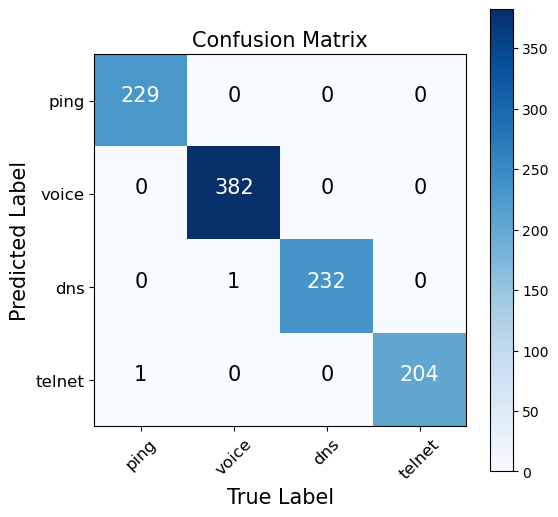

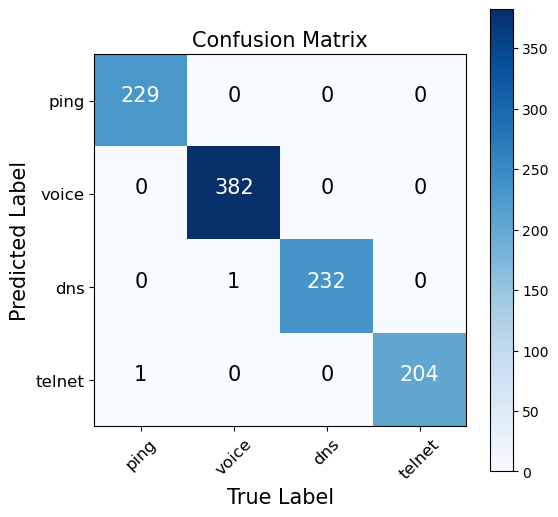

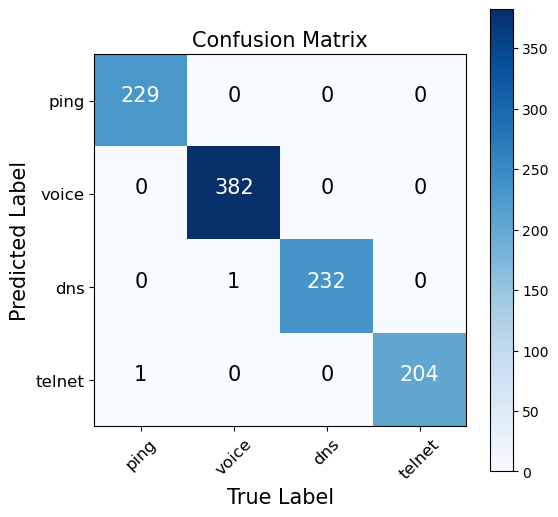

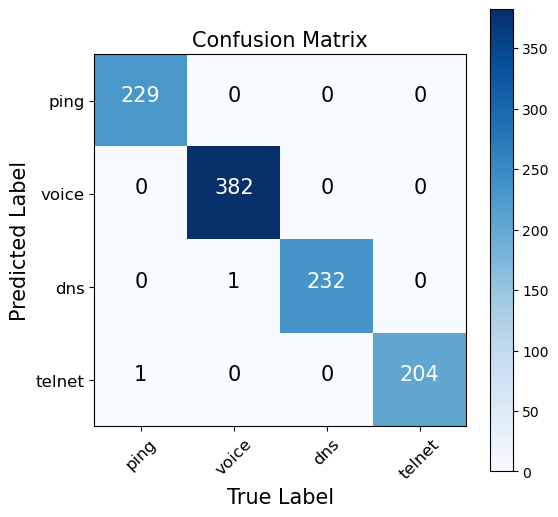

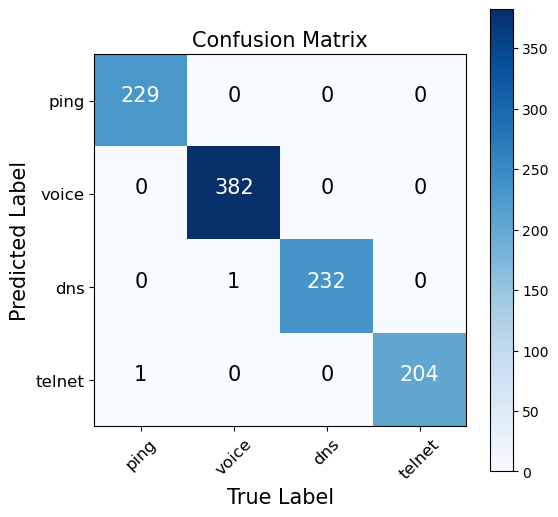

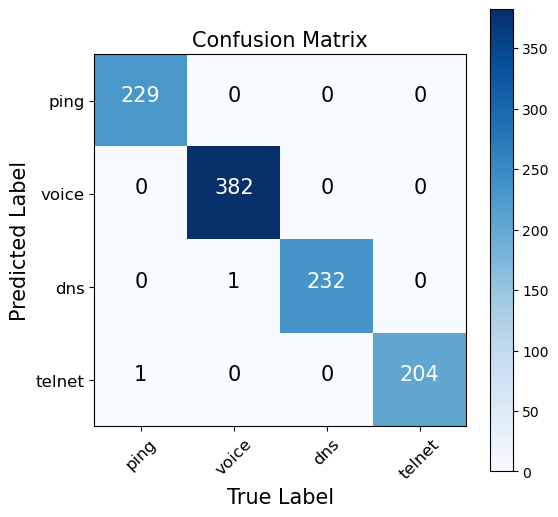

In [52]:
plt.figure(figsize=(6,6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix', fontsize=15)
plt.colorbar()
tick_marks = np.arange(len(y.unique()))
plt.xticks(tick_marks, y.unique(), rotation=45, fontsize=12)
plt.yticks(tick_marks, y.unique(), fontsize=12)
plt.xlabel('True Label', fontsize=15)
plt.ylabel('Predicted Label', fontsize=15)

for i in range(len(cm)):
    for j in range(len(cm[i])):
        color = 'black'   
        if cm[i][j] > 5:
            color = 'white'
        plt.text(j, i, format(cm[i][j]), 
                horizontalalignment='center',
                color=color, fontsize=15)
plt.show()

In [53]:
df.drop('Traffic Type',axis=1).values.mean(axis=0)


array([1.70408069e+03, 1.48843887e+05, 7.81476536e+00, 6.82359214e+02,
       7.76363983e+00, 6.09435952e+00, 6.77842999e+02, 5.30202926e+02,
       4.45717512e+03, 5.55677589e+05, 1.75257535e+01, 2.07078100e+03,
       1.74479206e+01, 1.57107175e+01, 2.06479550e+03, 1.94382919e+03])

In [54]:
df.drop('Traffic Type',axis=1).values.std(axis=0)


array([3.39886150e+03, 2.99131646e+05, 2.74429210e+01, 2.41679027e+03,
       2.73407328e+01, 1.06553633e+01, 2.40776758e+03, 9.37684041e+02,
       6.48632400e+03, 9.56300890e+05, 3.17238328e+01, 3.40442276e+03,
       3.16427299e+01, 1.84257205e+01, 3.40103158e+03, 2.73970854e+03])

In [55]:
scaler = StandardScaler()
scaler.fit(df.drop('Traffic Type',axis=1))

StandardScaler()

In [56]:
scaled_data = scaler.transform(df.drop('Traffic Type',axis=1))
scaled_data[0:5]

array([[-0.50136809, -0.49758656, -0.28476434, -0.2823411 , -0.28395873,
        -0.5719523 , -0.28152344, -0.56543879, -0.68716504, -0.58106982,
        -0.55244754, -0.608262  , -0.55140377, -0.85265146, -0.60710859,
        -0.70950218],
       [-0.50107387, -0.49725894, -0.24832507, -0.24179145, -0.24738327,
        -0.47810285, -0.24082183, -0.46092597, -0.68716504, -0.58106982,
        -0.55244754, -0.608262  , -0.55140377, -0.85265146, -0.60710859,
        -0.70950218],
       [-0.50107387, -0.49725894, -0.24832507, -0.24179145, -0.24738327,
        -0.47810285, -0.24082183, -0.46092597, -0.68716504, -0.58106982,
        -0.55244754, -0.608262  , -0.55140377, -0.85265146, -0.60710859,
        -0.70950218],
       [-0.50077966, -0.49693133, -0.24832507, -0.24179145, -0.24738327,
        -0.47810285, -0.24082183, -0.46092597, -0.68716504, -0.58106982,
        -0.55244754, -0.608262  , -0.55140377, -0.85265146, -0.60710859,
        -0.70950218],
       [-0.50077966, -0.49693133, -0

In [57]:
scaled_data.mean(axis=0)

array([ 4.33753673e-17, -6.50630510e-17,  0.00000000e+00, -2.16876837e-17,
        0.00000000e+00,  1.73501469e-16, -2.16876837e-17,  0.00000000e+00,
        0.00000000e+00, -5.42192091e-17, -5.42192091e-17,  3.25315255e-17,
        3.25315255e-17, -5.42192091e-17, -9.21726555e-17, -2.16876837e-17])

In [58]:
scaled_data.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [59]:
pca = PCA(n_components=2)
pca.fit(scaled_data)

PCA(n_components=2)

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

In [63]:
scaled_data.shape

(5242, 16)

In [64]:
x_pca = pca.transform(scaled_data)

In [65]:
x_pca.shape

(5242, 2)

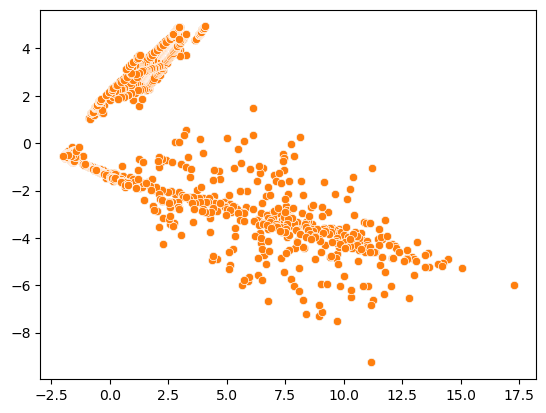

In [67]:
sns.scatterplot(x=x_pca[:,0], y=x_pca[:,1], data=df)
plt.show()

In [68]:
pca.explained_variance_ratio_.sum()*100


78.18143984267064

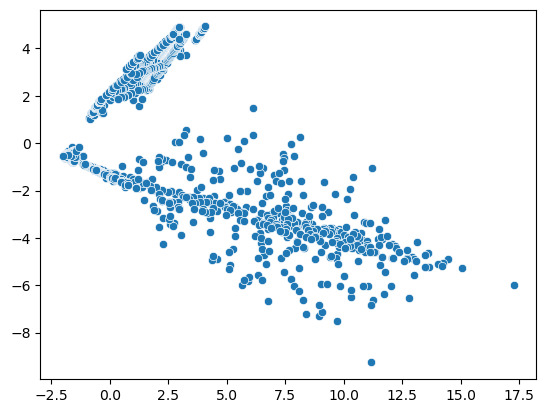

In [69]:
sns.scatterplot(x=x_pca[:,0], y=x_pca[:,1], data=df)
plt.show()


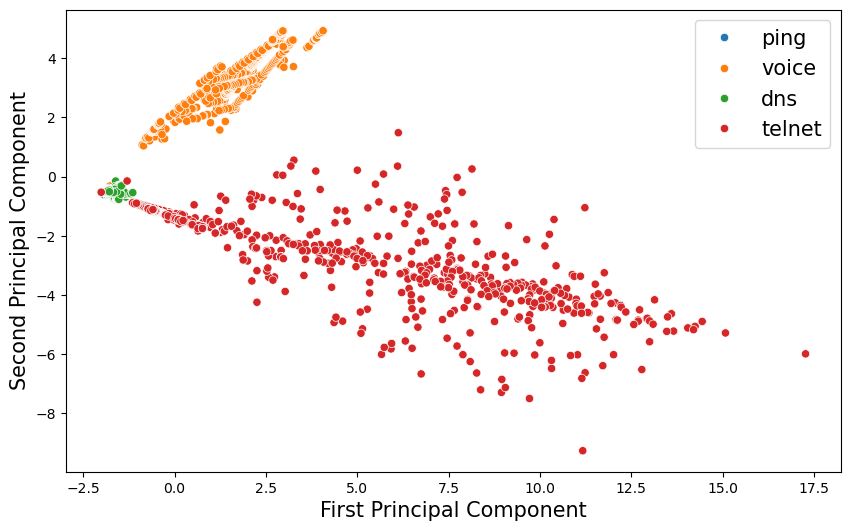

In [70]:
fig = plt.figure(figsize=(10,6))
sns.scatterplot(x = x_pca[:,0], y = x_pca[:,1], hue=df['Traffic Type'])
plt.xlabel('First Principal Component', fontsize=15)
plt.ylabel('Second Principal Component', fontsize=15)
plt.legend(fontsize=15)
plt.show()

In [71]:
pca.explained_variance_ratio_

array([0.49927297, 0.28254143])

In [72]:
X_train, X_test, y_train, y_test = train_test_split(x_pca,y,test_size=0.2, random_state=42)


In [73]:
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [74]:
predictions = clf.predict(X_test)
print('Accuracy: %.2f%%' % (accuracy_score(predictions,y_test)*100))

Accuracy: 99.62%


In [75]:
x_min = x_pca[:,0].min()
x_max = x_pca[:,0].max()
y_min = x_pca[:,1].min()
y_max = x_pca[:,1].max()
spacing = 0.01

In [76]:
xx, yy = np.meshgrid(np.arange(x_min, x_max, spacing), np.arange(y_min, y_max, spacing))

In [77]:
plt.figure(figsize=(10,6))
#plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
sns.scatterplot(x = x_pca[:,0], y = x_pca[:,1], hue=df['Traffic Type'], cmap=plt.cm.Spectral)
plt.title('Decision Boundaries', fontsize=15)
plt.xlabel('First Principal Component', fontsize=15)
plt.ylabel('Second Principal Component', fontsize=15)
plt.tight_layout()
plt.xlim([x_min,x_max])
plt.ylim([y_min,y_max])
plt.legend(fontsize=15)
plt.show()


AttributeError: Line2D.set() got an unexpected keyword argument 'cmap'

In [78]:
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

In [79]:
pca.components_

array([[ 0.2193273 ,  0.21774033,  0.27991502,  0.27949669,  0.27989271,
         0.18805132,  0.27947491,  0.18683999,  0.23074356,  0.17425186,
         0.32204612,  0.26877389,  0.32175843,  0.23273741,  0.26830621,
         0.17903189],
       [-0.23989077, -0.24295298, -0.22856892, -0.22949674, -0.22818819,
        -0.24128288, -0.22911913, -0.24408503,  0.24492561,  0.33936796,
         0.09181439,  0.27331247,  0.09303943,  0.27259447,  0.27399619,
         0.37393403]])

In [80]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = x_pca[:,0], y = x_pca[:,1], hue=df['Traffic Type'], cmap=plt.cm.Spectral)
plt.title('Decision Boundaries', fontsize=15)
plt.xlabel('First Principal Component', fontsize=15)
plt.ylabel('Second Principal Component', fontsize=15)
plt.tight_layout()
plt.xlim([x_min,x_max])
plt.ylim([y_min,y_max])
plt.legend(fontsize=15)
plt.show()

AttributeError: Line2D.set() got an unexpected keyword argument 'cmap'

In [81]:
xx, yy = np.meshgrid(np.arange(x_min, x_max, spacing), np.arange(y_min, y_max, spacing))

In [82]:
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

In [83]:
plt.figure(figsize=(10,6))
#plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
sns.scatterplot(x = x_pca[:,0], y = x_pca[:,1], hue=df['Traffic Type'], cmap=plt.cm.Spectral)
plt.title('Decision Boundaries', fontsize=15)
plt.xlabel('First Principal Component', fontsize=15)
plt.ylabel('Second Principal Component', fontsize=15)
plt.tight_layout()
plt.xlim([x_min,x_max])
plt.ylim([y_min,y_max])
plt.legend(fontsize=15)
plt.show()

AttributeError: Line2D.set() got an unexpected keyword argument 'cmap'

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

# Создание color map из Spectral
cmap = ListedColormap(plt.cm.Spectral.colors)

# Построение графика с использованием цветов из cmap
plt.figure(figsize=(10,6))
sns.scatterplot(x=x_pca[:, 0], y=x_pca[:, 1], hue=df['Traffic Type'], palette=cmap)
plt.title('Decision Boundaries', fontsize=15)
plt.xlabel('First Principal Component', fontsize=15)
plt.ylabel('Second Principal Component', fontsize=15)
plt.tight_layout()
plt.xlim([x_min, x_max])
plt.ylim([y_min, y_max])
plt.legend(fontsize=15)
plt.show()


AttributeError: 'LinearSegmentedColormap' object has no attribute 'colors'

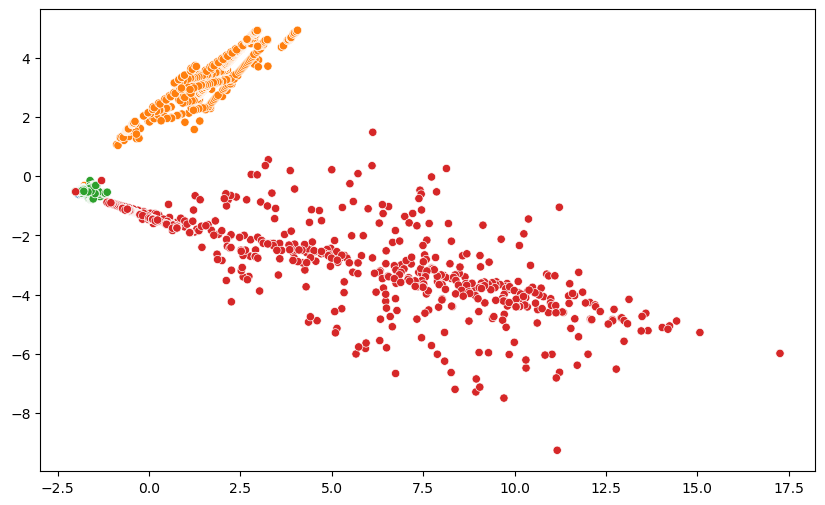

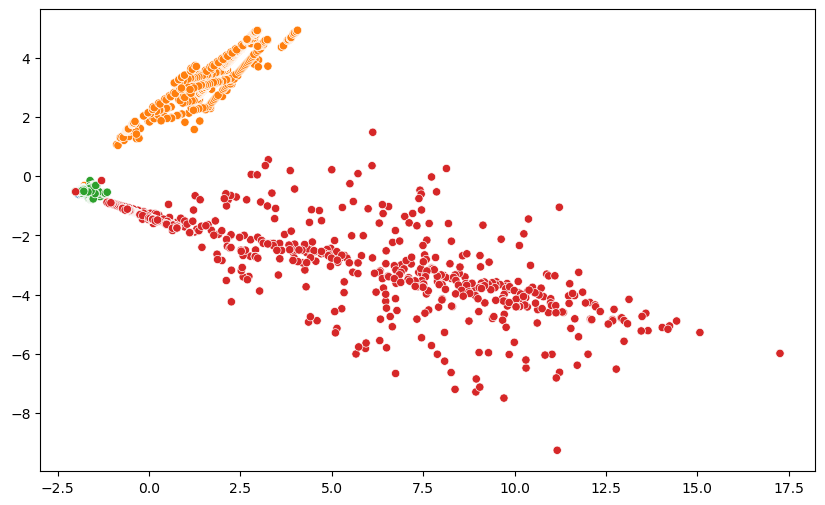

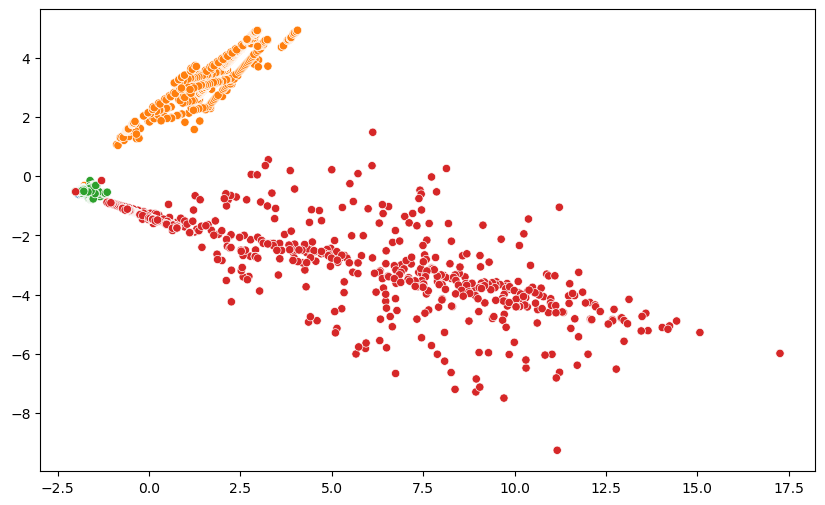

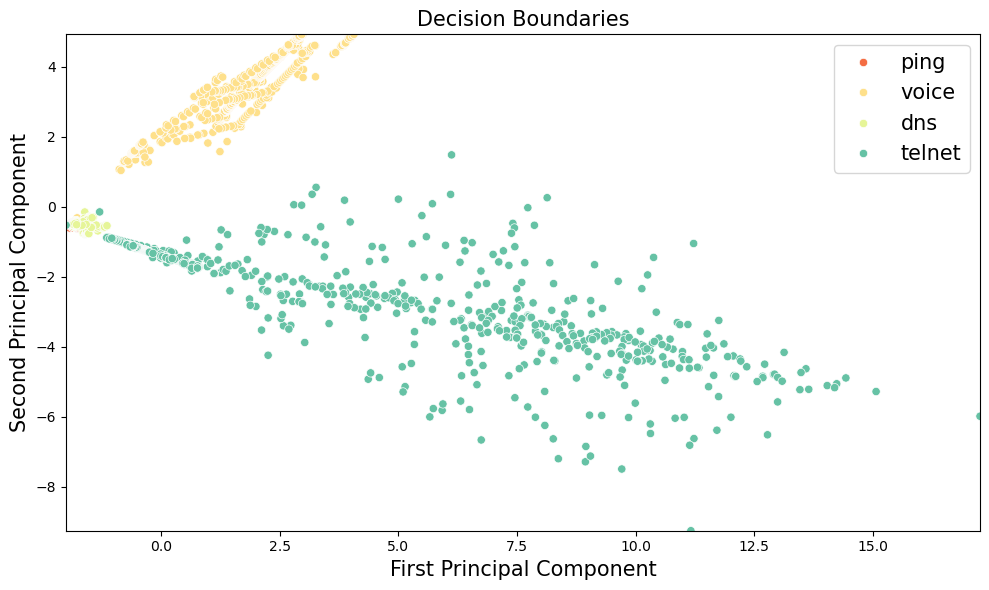

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

# Построение графика с использованием цвета из Spectral
plt.figure(figsize=(10,6))
sns.scatterplot(x=x_pca[:, 0], y=x_pca[:, 1], hue=df['Traffic Type'], palette='Spectral')
plt.title('Decision Boundaries', fontsize=15)
plt.xlabel('First Principal Component', fontsize=15)
plt.ylabel('Second Principal Component', fontsize=15)
plt.tight_layout()
plt.xlim([x_min, x_max])
plt.ylim([y_min, y_max])
plt.legend(fontsize=15)
plt.show()


In [86]:
plt.figure(figsize=(10,6))
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
sns.scatterplot(x = x_pca[:,0], y = x_pca[:,1], hue=df['Traffic Type'], cmap=plt.cm.Spectral)
plt.title('Decision Boundaries', fontsize=15)
plt.xlabel('First Principal Component', fontsize=15)
plt.ylabel('Second Principal Component', fontsize=15)
plt.tight_layout()
plt.xlim([x_min,x_max])
plt.ylim([y_min,y_max])
plt.legend(fontsize=15)

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [87]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = x_pca[:,0], y = x_pca[:,1], hue=df['Traffic Type'], palette='Spectral')
plt.title('Decision Boundaries', fontsize=15)
plt.xlabel('First Principal Component', fontsize=15)
plt.ylabel('Second Principal Component', fontsize=15)
plt.tight_layout()
plt.xlim([x_min,x_max])
plt.ylim([y_min,y_max])
plt.legend(fontsize=15)

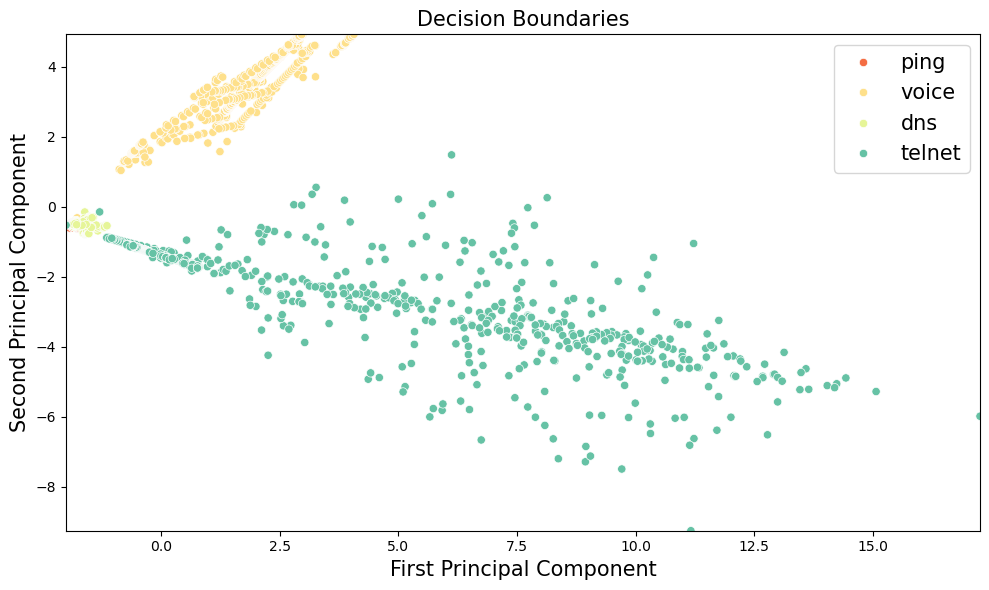

In [89]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = x_pca[:,0], y = x_pca[:,1], hue=df['Traffic Type'], palette='Spectral')
plt.title('Decision Boundaries', fontsize=15)
plt.xlabel('First Principal Component', fontsize=15)
plt.ylabel('Second Principal Component', fontsize=15)
plt.tight_layout()
plt.xlim([x_min,x_max])
plt.ylim([y_min,y_max])
plt.legend(fontsize=15)
plt.show()

In [90]:
X = df.drop('Traffic Type',axis=1)
y = df['Traffic Type']


In [91]:
model = KMeans(n_clusters=len(y.cat.categories))

AttributeError: Can only use .cat accessor with a 'category' dtype

In [119]:
ping_df = pd.read_csv('/Users/mikhailkatsuro/Downloads/diplom/ping_training_data.csv', delimiter='\t')
voice_df = pd.read_csv('/Users/mikhailkatsuro/Downloads/diplom/voice_training_data.csv', delimiter='\t')
dns_df = pd.read_csv('/Users/mikhailkatsuro/Downloads/diplom/dns_training_data.csv', delimiter='\t')
telnet_df = pd.read_csv('/Users/mikhailkatsuro/Downloads/diplom/telnet_training_data.csv', delimiter='\t')
df = pd.concat([ping_df, voice_df, dns_df, telnet_df], ignore_index=True)
X = df.drop('Traffic Type',axis=1)
y = df['Traffic Type'].astype('category')

In [120]:
n_clusters = len(y.cat.categories)


In [121]:
model = KMeans(n_clusters=n_clusters)

In [122]:
clusters = model.fit_predict(X)

ValueError: Input X contains NaN.
KMeans does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [114]:
model.cluster_centers_.shape

(4, 16)

In [115]:
fig = plt.figure(figsize=(8, 3))
for i in range(len(y.cat.categories)):
    ax = fig.add_subplot(2, 2, 1 + i, xticks=[], yticks=[])
    ax.set_title(str(y.cat.categories[i]))
    ax.imshow(model.cluster_centers_[i].reshape((1, 16)), cmap=plt.cm.binary)

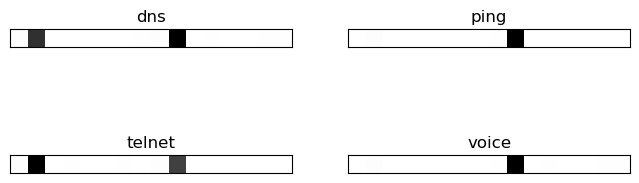

In [116]:
plt.show()

In [117]:
clusters = model.fit_predict(X)

In [153]:
ping_df = pd.read_csv('/Users/mikhailkatsuro/Downloads/diplom/ping_training_data.csv', delimiter='\t')
voice_df = pd.read_csv('/Users/mikhailkatsuro/Downloads/diplom/voice_training_data.csv', delimiter='\t')
dns_df = pd.read_csv('/Users/mikhailkatsuro/Downloads/diplom/dns_training_data.csv', delimiter='\t')
telnet_df = pd.read_csv('/Users/mikhailkatsuro/Downloads/diplom/telnet_training_data.csv', delimiter='\t')
df = pd.concat([ping_df, voice_df, dns_df, telnet_df], ignore_index=True)
df.dropna(inplace=True)
df.drop('Forward Packets', axis=1, inplace=True)
df.drop('Forward Bytes', axis=1, inplace=True)
df.drop('Reverse Packets', axis=1, inplace=True)
df.drop('Reverse Bytes', axis=1, inplace=True)
df.describe()
df['Traffic Type'] = df['Traffic Type'].astype('category')
df['Traffic Type'].cat.categories
df['Traffic Type'].cat.codes.head()


0    1
1    1
2    1
3    1
4    1
dtype: int8

In [154]:
model = KMeans(n_clusters=len(y.cat.categories))

In [155]:
X = df.drop('Traffic Type',axis=1)
y = df['Traffic Type'].astype('category')

In [156]:
model = KMeans(n_clusters=len(y.cat.categories))

In [157]:
clusters = model.fit_predict(X)

In [158]:
model.cluster_centers_.shape

(4, 12)

In [159]:
fig = plt.figure(figsize=(8, 3))
for i in range(len(y.cat.categories)):
    ax = fig.add_subplot(2, 2, 1 + i, xticks=[], yticks=[])
    ax.set_title(str(y.cat.categories[i]))
    ax.imshow(model.cluster_centers_[i].reshape((1, 12)), cmap=plt.cm.binary)

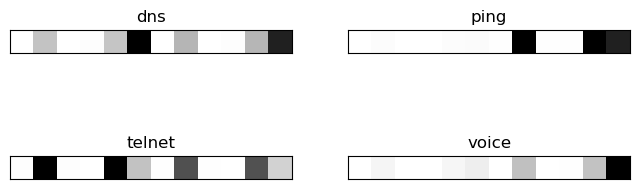

In [160]:
plt.show()

In [161]:
df['Traffic Type'].value_counts()

Traffic Type
ping      1770
telnet    1181
dns       1154
voice     1137
Name: count, dtype: int64

In [162]:
from sklearn.preprocessing import LabelEncoder
df = pd.DataFrame({
    'Traffic Type': ['DNS', 'Telnet', 'Voice', 'DNS', 'Ping', 'DNS', 'Voice']
})

In [163]:
label_encoder = LabelEncoder()
y_codes = label_encoder.fit_transform(df['Traffic Type'])

In [164]:
num_dns = y_codes.tolist().count(0) #DNS
print(f"Number of DNS entries: {num_dns}")

Number of DNS entries: 3


In [165]:
y_codes_series = pd.Series(y_codes)
print(y_codes_series)

0    0
1    2
2    3
3    0
4    1
5    0
6    3
dtype: int64


In [166]:
y_codes.tolist().count(1) 

1

In [167]:
y_codes.tolist().count(2)

1

In [168]:
y_codes.tolist().count(3)

2

In [169]:
strlabels = ['']*len(y)
for i in range(len(clusters)):
    if clusters[i]==0: strlabels[i] = 'dns'
    elif clusters[i]==1: strlabels[i] = 'ping'
    elif clusters[i]==2: strlabels[i] = 'telnet'
    elif clusters[i]==3: strlabels[i] = 'voice'

In [170]:
from sklearn.metrics import accuracy_score
accuracy_score(y, strlabels)*100.0

30.827928271652038

In [171]:
from sklearn.decomposition import PCA
X = PCA(2).fit_transform(X)

In [172]:
y_codes =  np.asarray(y.cat.codes)

In [173]:
labels = np.zeros_like(clusters) # Create an array of 0s with equal length ot the number of clusters

# Set labels based on the modes of the target
for i in range(len(y.cat.categories)):
    mask = (clusters == i)
    labels[mask] = stats.mode(y_codes[mask])[0]
print (labels)

[1 1 1 ... 1 1 1]


In [174]:
kwargs = dict(cmap = plt.cm.get_cmap('rainbow', 4),
              edgecolor='none', alpha=0.6)
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].scatter(X[:, 0], X[:, 1], c=clusters, **kwargs)
ax[0].set_title('learned cluster labels')

ax[1].scatter(X[:, 0], X[:, 1], c=y_codes, **kwargs)
ax[1].set_title('true labels');

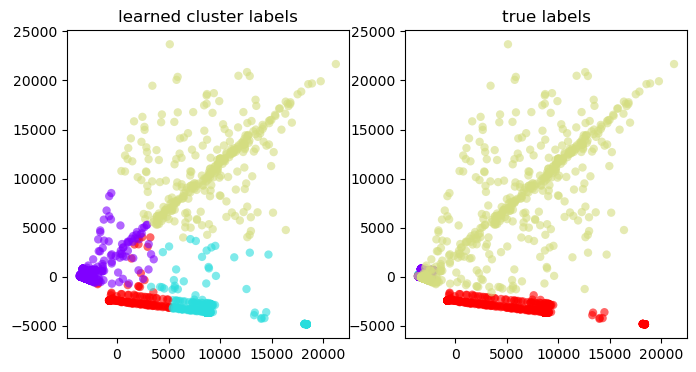

In [175]:
plt.show()

In [176]:
cm=confusion_matrix(y, strlabels, labels=['ping','voice','dns','telnet'])
cm

array([[   0,    0, 1770,    0],
       [ 982,  152,    3,    0],
       [   0,    0, 1154,    0],
       [  27,   16,  828,  310]])

In [177]:
plt.figure(figsize=(6,6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix', fontsize=15)
plt.colorbar()
tick_marks = np.arange(len(y.unique()))
plt.xticks(tick_marks, rotation=45, fontsize=12)
plt.yticks(tick_marks,  fontsize=12)
plt.xlabel('True Label', fontsize=15)
plt.ylabel('Predicted Label', fontsize=15)

for i in range(len(cm)):
    for j in range(len(cm[i])):
        color = 'black'   
        if cm[i][j] > 5:
            color = 'white'
        plt.text(j, i, format(cm[i][j]), 
                horizontalalignment='center',
                color=color, fontsize=15)

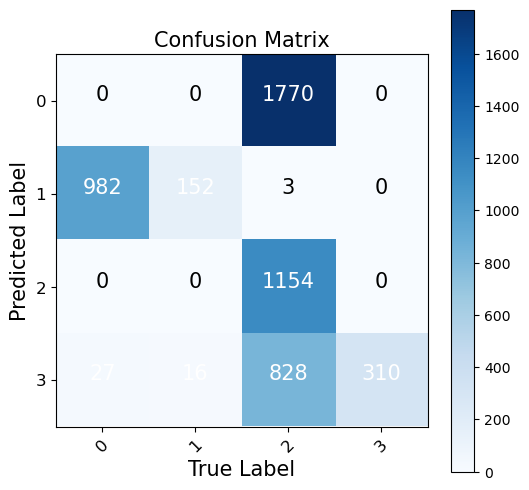

In [178]:
plt.show()

In [179]:
pickle.dump(model,open('KMeans_Clustering','wb'))

In [207]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import pickle

# Загрузка данных
ping_df = pd.read_csv('/Users/mikhailkatsuro/Downloads/diplom/ping_training_data.csv', delimiter='\t')
voice_df = pd.read_csv('/Users/mikhailkatsuro/Downloads/diplom/voice_training_data.csv', delimiter='\t')
dns_df = pd.read_csv('/Users/mikhailkatsuro/Downloads/diplom/dns_training_data.csv', delimiter='\t')
telnet_df = pd.read_csv('/Users/mikhailkatsuro/Downloads/diplom/telnet_training_data.csv', delimiter='\t')
df = pd.concat([ping_df, voice_df, dns_df, telnet_df], ignore_index=True)

# Обработка данных
df.dropna(inplace=True)
df.drop(['Forward Packets', 'Forward Bytes', 'Reverse Packets', 'Reverse Bytes'], axis=1, inplace=True)

# Преобразование категориальных данных
df['Traffic Type'] = df['Traffic Type'].astype('category')
y = df['Traffic Type']
X = df.drop('Traffic Type', axis=1)

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Пример использования модели
idx = 2590  # случайный индекс
single_x_test = [df.iloc[idx].drop('Traffic Type').tolist()]
single_y_test = df.iloc[idx]['Traffic Type']
single_prediction = clf.predict(single_x_test)
print(f"For this sample, our model predicted {single_prediction[0]} and it was actually {single_y_test}")

# Сохранение модели
with open('/Users/mikhailkatsuro/Downloads/diplom/DecisionTree.pkl', 'wb') as f:
    pickle.dump(clf, f)


For this sample, our model predicted voice and it was actually voice


In [210]:
ping_df = pd.read_csv('/Users/mikhailkatsuro/Downloads/diplom/ping_training_data.csv', delimiter='\t')
voice_df = pd.read_csv('/Users/mikhailkatsuro/Downloads/diplom/voice_training_data.csv', delimiter='\t')
dns_df = pd.read_csv('/Users/mikhailkatsuro/Downloads/diplom/dns_training_data.csv', delimiter='\t')
telnet_df = pd.read_csv('/Users/mikhailkatsuro/Downloads/diplom/telnet_training_data.csv', delimiter='\t')
df = pd.concat([ping_df, voice_df, dns_df, telnet_df], ignore_index=True)
df.dropna(inplace=True)
df.drop('Forward Packets', axis=1, inplace=True)
df.drop('Forward Bytes', axis=1, inplace=True)
df.drop('Reverse Packets', axis=1, inplace=True)
df.drop('Reverse Bytes', axis=1, inplace=True)
print(df.shape)
df['Traffic Type'] = df['Traffic Type'].astype('category')
df['Traffic Type'].cat.categories
df['Traffic Type'].cat.codes.head()
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
ping_df = pd.read_csv('/Users/mikhailkatsuro/Downloads/diplom/ping_training_data.csv', delimiter='\t')
voice_df = pd.read_csv('/Users/mikhailkatsuro/Downloads/diplom/voice_training_data.csv', delimiter='\t')
dns_df = pd.read_csv('/Users/mikhailkatsuro/Downloads/diplom/dns_training_data.csv', delimiter='\t')
telnet_df = pd.read_csv('/Users/mikhailkatsuro/Downloads/diplom/telnet_training_data.csv', delimiter='\t')
df = pd.concat([ping_df, voice_df, dns_df, telnet_df], ignore_index=True)
df.dropna(inplace=True)
X = df.drop('Traffic Type', axis=1)
y = df['Traffic Type']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train,y_train)
idx = 2590 #random number
single_x_test = [df.iloc[idx].drop('Traffic Type').tolist()]
single_y_test = df.iloc[idx]['Traffic Type']
single_prediction = clf.predict(single_x_test)

predictions = clf.predict(X_test)
resultsDF = pd.DataFrame({
        'true':y_test,
        'predicted':predictions
    })
resultsDF.head()
print('Accuracy: %.2f%%' % (accuracy_score(predictions,y_test)*100))
import pickle

# Сохраняем модель в файл
with open('/Users/mikhailkatsuro/Downloads/diplom/DecisionTree.pkl', 'wb') as f:
    pickle.dump(model, f)

(5242, 13)
Accuracy: 99.81%
